PROCUREMENT KPI ANALYSIS

NAZIM ATAKAN ERDOGAN

DATA ANALYST INTERN



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
kpi = pd.read_csv('/content/Procurement KPI Analysis Dataset.csv')
kpi.head(
)

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [ ]:
kpi = kpi.drop(columns=['PO_ID'])
kpi.head()

,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [ ]:
kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Supplier          777 non-null    object 
 1   Order_Date        777 non-null    object 
 2   Delivery_Date     690 non-null    object 
 3   Item_Category     777 non-null    object 
 4   Order_Status      777 non-null    object 
 5   Quantity          777 non-null    int64  
 6   Unit_Price        777 non-null    float64
 7   Negotiated_Price  777 non-null    float64
 8   Defective_Units   641 non-null    float64
 9   Compliance        777 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 60.8+ KB


In [ ]:
kpi.dtypes

,0
Supplier,object
Order_Date,object
Delivery_Date,object
Item_Category,object
Order_Status,object
Quantity,int64
Unit_Price,float64
Negotiated_Price,float64
Defective_Units,float64
Compliance,object


In [ ]:
kpi.describe()

,Quantity,Unit_Price,Negotiated_Price,Defective_Units
count,777.000000,777.000000,777.000000,641.000000
mean,1094.660232,58.283822,53.660721,74.803432
std,647.844551,28.101315,26.094930,69.187870
min,51.000000,10.840000,9.270000,0.000000
25%,615.000000,33.290000,30.460000,26.000000
50%,1075.000000,58.950000,53.800000,49.000000
75%,1548.000000,83.130000,76.550000,100.000000
max,5000.000000,109.170000,107.390000,321.000000


In [ ]:
kpi.isnull().sum()

,0
Supplier,0
Order_Date,0
Delivery_Date,87
Item_Category,0
Order_Status,0
Quantity,0
Unit_Price,0
Negotiated_Price,0
Defective_Units,136
Compliance,0


In [ ]:
kpi['Defective_Units'].value_counts()
kpi = kpi.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kpi['Order_Status'] = le.fit_transform(kpi['Order_Status'])
kpi.head()


,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
1,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,1,1509,39.32,37.34,235.0,Yes
2,Gamma_Co,2022-01-26,2022-02-15,MRO,1,910,95.51,92.26,41.0,Yes
3,Beta_Supplies,2022-10-09,2022-10-28,Packaging,1,1344,99.85,95.52,112.0,Yes
4,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,1,1180,64.07,60.53,171.0,No
5,Epsilon_Group,2022-08-17,2022-08-29,MRO,1,1145,69.21,63.57,39.0,Yes


In [ ]:
# cancelled = 0, delivered = 1

In [ ]:
date = kpi.groupby('Order_Date')['Delivery_Date'].sum()
date

,Delivery_Date
Order_Date,
2022-01-01,2022-01-122022-01-07
2022-01-02,2022-01-06
2022-01-03,2022-01-20
2022-01-04,2022-01-122022-01-06
2022-01-06,2022-01-14
...,...
2023-12-20,2024-01-012024-01-09
2023-12-23,2024-01-03
2023-12-25,2024-01-12


In [ ]:
kpi_cancelled = kpi[kpi['Order_Status'] == 0]
kpi_cancelled.head()

,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
20,Epsilon_Group,2022-01-28,2022-02-12,Electronics,0,1735,20.54,19.69,49.0,Yes
53,Delta_Logistics,2022-03-22,2022-03-28,Office Supplies,0,1640,77.92,76.41,262.0,No
70,Alpha_Inc,2023-01-25,2023-02-08,MRO,0,826,60.50,57.18,18.0,Yes
82,Beta_Supplies,2023-12-01,2023-12-07,Electronics,0,84,73.38,71.42,9.0,Yes
105,Delta_Logistics,2022-10-02,2022-10-22,MRO,0,865,14.70,13.14,135.0,No


In [ ]:
num = kpi.select_dtypes(include=np.number)
cat = kpi.select_dtypes(exclude=np.number)

In [ ]:
num.columns

Index(['Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units'],
      dtype='object')

<Axes: xlabel='Unit_Price', ylabel='Density'>

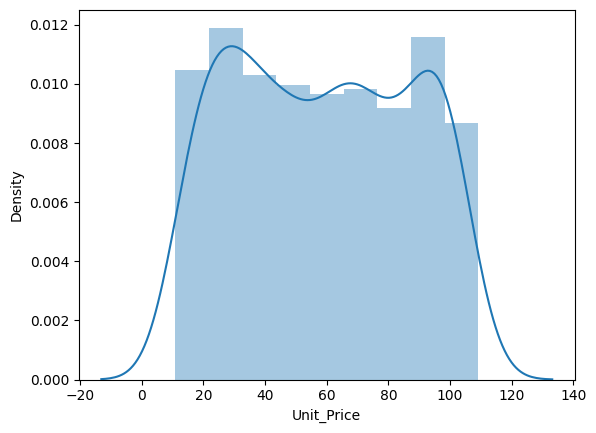

In [ ]:
sns.distplot(kpi['Unit_Price'])

<Axes: xlabel='Unit_Price', ylabel='Count'>

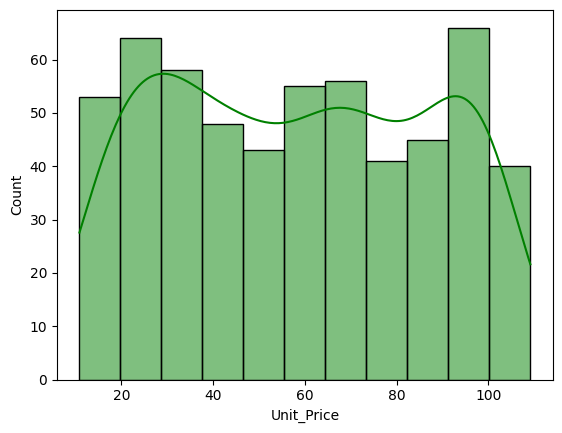

In [ ]:
sns.histplot(kpi['Unit_Price'], kde=True, color='green')

<Axes: xlabel='Quantity', ylabel='Count'>

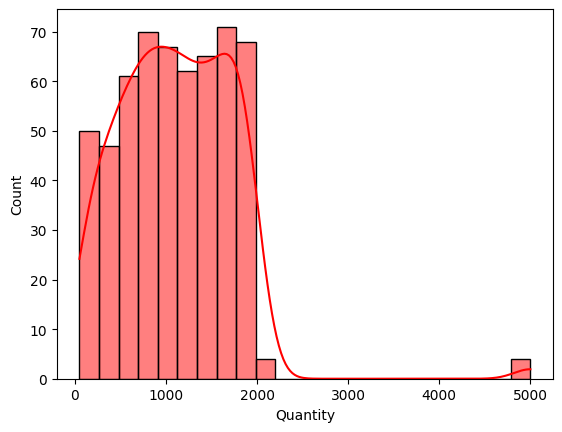

In [ ]:
sns.histplot(kpi['Quantity'], kde=True, color='red')

<Axes: ylabel='Quantity'>

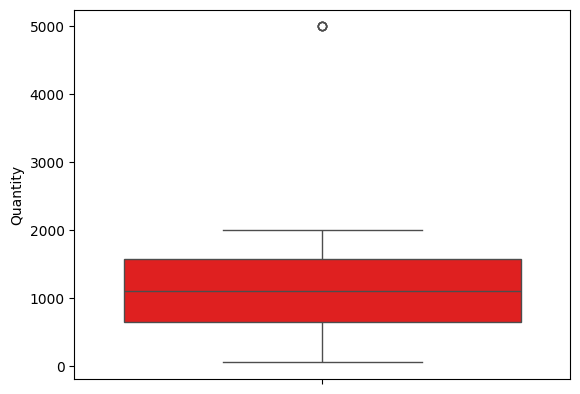

In [ ]:
sns.boxplot(kpi['Quantity'],color='red')

<Axes: xlabel='Quantity', ylabel='Density'>

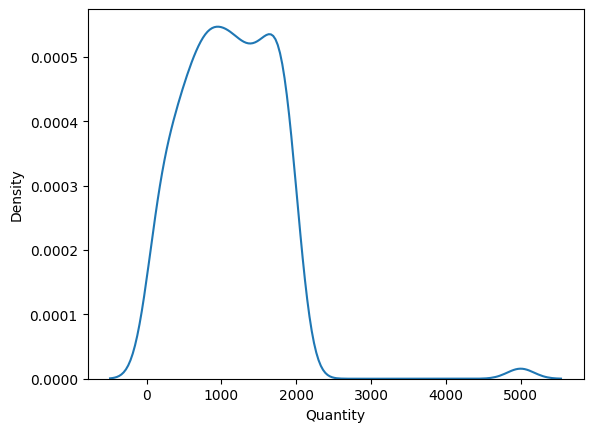

In [ ]:
sns.kdeplot(kpi['Quantity'])

In [ ]:
# here we are going to remove outliers

Q1 = kpi['Quantity'].quantile(0.25)
Q3 = kpi['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

kpi = kpi[(kpi['Quantity'] >= lower_bound) & (kpi['Quantity'] <= upper_bound)]



In [ ]:
kpi_for_boxplot = kpi.drop('Order_Status', axis=1)
kpi_for_boxplot.columns

Index(['Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category', 'Quantity',
       'Unit_Price', 'Negotiated_Price', 'Defective_Units', 'Compliance'],
      dtype='object')

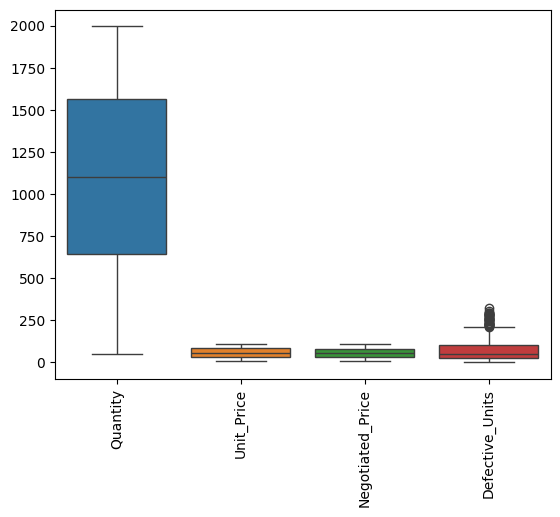

In [ ]:
sns.boxplot(kpi_for_boxplot)
plt.xticks(rotation=90)
plt.show()

<Axes: >

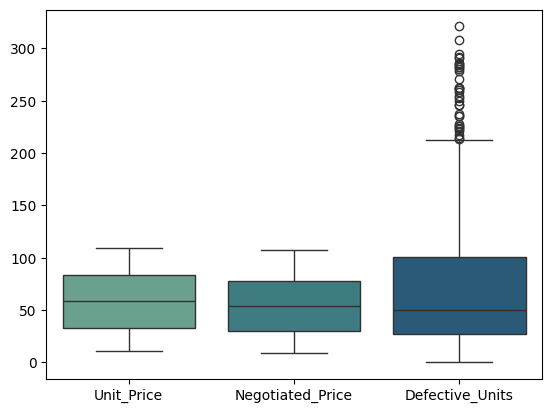

In [ ]:
sns.boxplot(kpi[['Unit_Price', 'Negotiated_Price', 'Defective_Units']], palette='crest')

<Axes: xlabel='Quantity', ylabel='Count'>

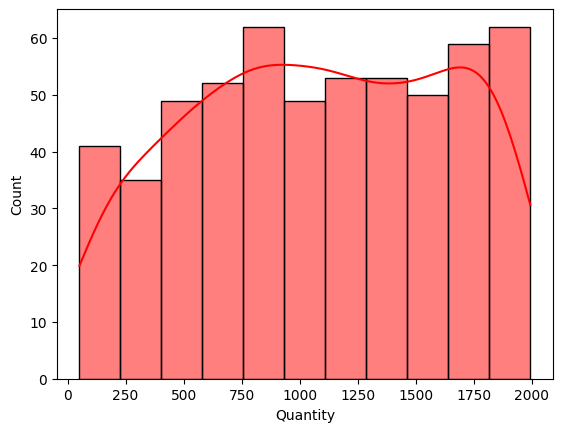

In [ ]:
sns.histplot(kpi['Quantity'], kde=True, color='red') #outliers removed

In [ ]:
kpi.columns

Index(['Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

<Axes: xlabel='Unit_Price', ylabel='Density'>

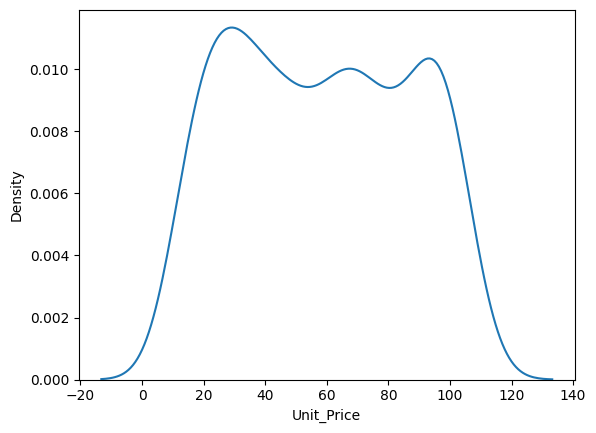

In [ ]:
sns.kdeplot(kpi['Unit_Price'])

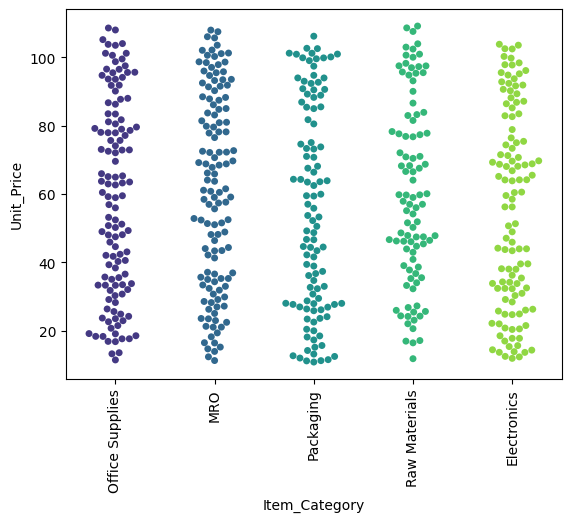

In [ ]:
sns.swarmplot(x='Item_Category', y='Unit_Price', data=kpi, palette='viridis')
plt.xticks(rotation=90)
plt.show()

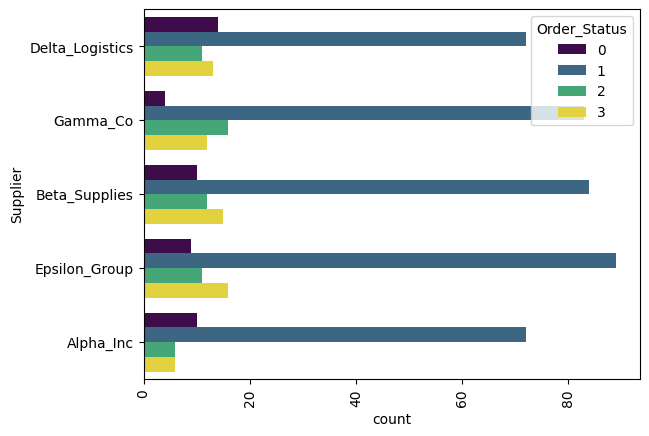

In [ ]:
sns.countplot(y='Supplier', hue='Order_Status', data=kpi, palette='viridis')
plt.xticks(rotation=90)
plt.show()

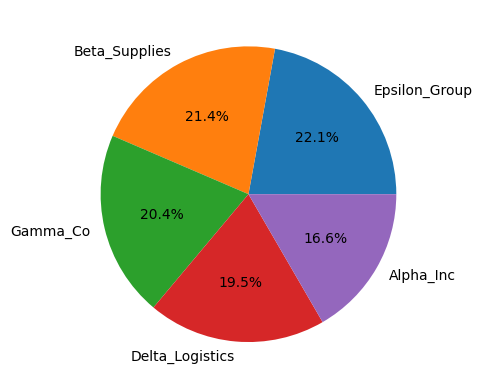

In [ ]:
plt.pie(kpi['Supplier'].value_counts(), labels=kpi['Supplier'].value_counts().index, autopct='%1.1f%%')
plt.show()

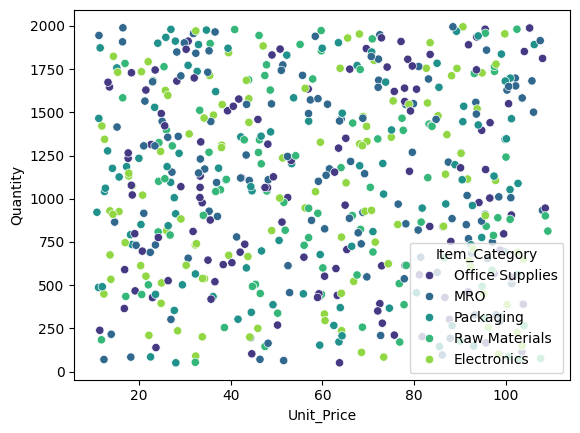

In [ ]:
sns.scatterplot(x='Unit_Price', y='Quantity', data=kpi, hue='Item_Category', palette='viridis')
plt.show()

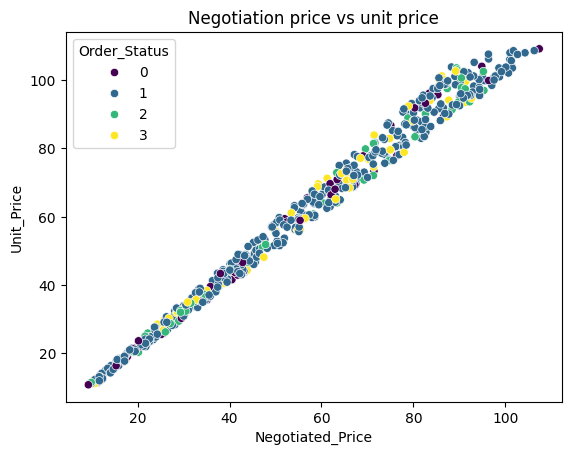

In [ ]:
sns.scatterplot(x='Negotiated_Price', y='Unit_Price', data=kpi, hue='Order_Status', palette='viridis')
plt.title('Negotiation price vs unit price')
plt.show()

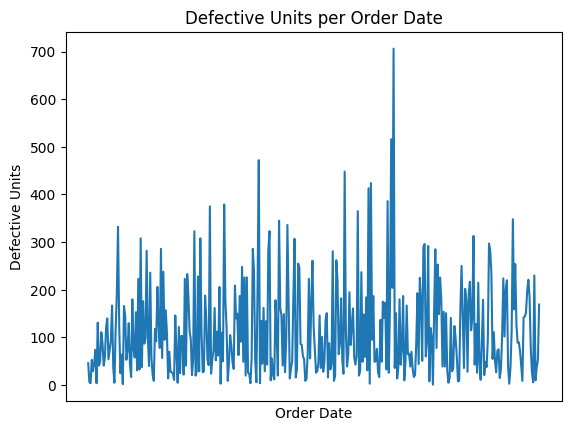

In [ ]:
# defective units per order date

kpi_defective = kpi.groupby('Order_Date')['Defective_Units'].sum()
plt.plot(kpi_defective)
plt.xlabel('Order Date')
plt.ylabel('Defective Units')
plt.title('Defective Units per Order Date')
plt.xticks([])
plt.show()

<Axes: ylabel='Defective_Units'>

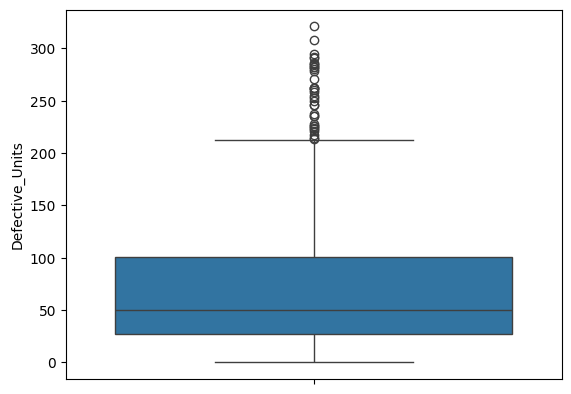

In [ ]:
sns.boxplot(kpi['Defective_Units'])

In [ ]:
q1 = kpi['Defective_Units'].quantile(0.25)
q3 = kpi['Defective_Units'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

kpi = kpi[(kpi['Defective_Units'] >= lower_bound) & (kpi['Defective_Units'] <= upper_bound)]


<Axes: ylabel='Defective_Units'>

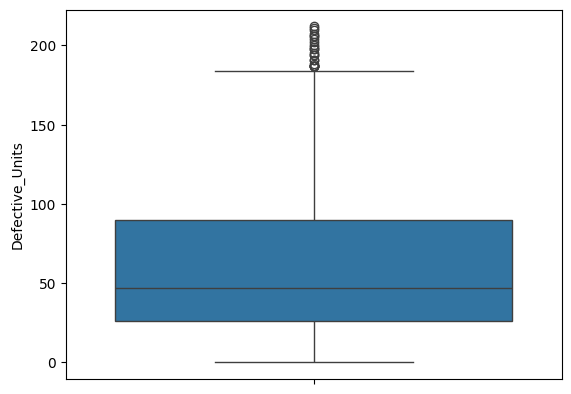

In [ ]:
sns.boxplot(kpi['Defective_Units']) #weniger outliers

In [ ]:
kpi.columns

Index(['Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

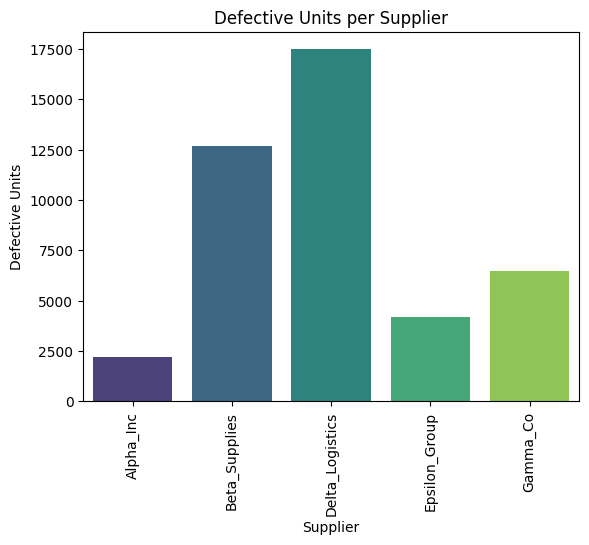

In [ ]:
# supplier vs defective units

kpi_defective_supplier = kpi.groupby('Supplier')['Defective_Units'].sum()
sns.barplot(x=kpi_defective_supplier.index, y=kpi_defective_supplier.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Supplier')
plt.ylabel('Defective Units')
plt.title('Defective Units per Supplier')
plt.show()

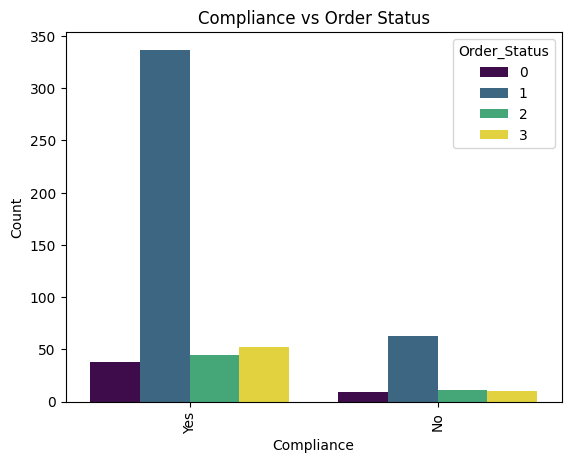

In [ ]:
sns.countplot(x='Compliance', hue='Order_Status', data=kpi, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Compliance')
plt.ylabel('Count')
plt.title('Compliance vs Order Status')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Alpha_Inc'),
  Text(1, 0, 'Beta_Supplies'),
  Text(2, 0, 'Delta_Logistics'),
  Text(3, 0, 'Epsilon_Group'),
  Text(4, 0, 'Gamma_Co')])

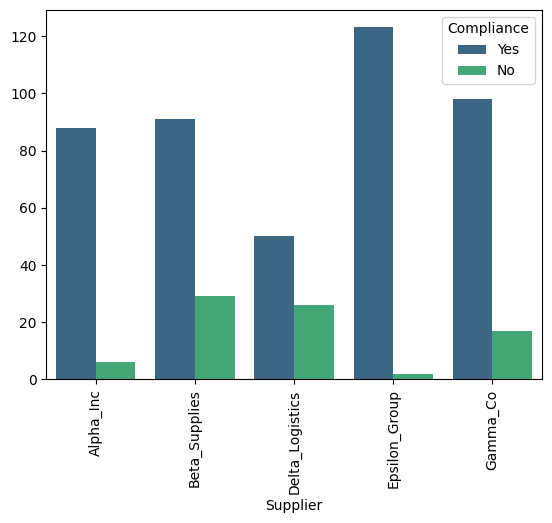

In [ ]:
# compliance per supplier

comp_sup = kpi.groupby('Supplier')['Compliance'].value_counts()
comp_sup

sns.barplot(x=comp_sup.index.get_level_values(0), y=comp_sup.values, hue=comp_sup.index.get_level_values(1), palette='viridis')
plt.xticks(rotation=90)


In [ ]:
kpi.columns

Index(['Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

In [ ]:
kpi_for_train = kpi.drop(['Order_Date', 'Delivery_Date', 'Supplier', 'Item_Category'], axis=1)
kpi_for_train.columns

Index(['Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

In [ ]:
kpi_for_train.isna().sum()
kpi_for_train = kpi_for_train.dropna()

In [ ]:
kpi_for_train['Compliance'] = le.fit_transform(kpi_for_train['Compliance'])
kpi_for_train.head()

,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
1,1,1509,39.32,37.34,235.0,1
2,1,910,95.51,92.26,41.0,1
3,1,1344,99.85,95.52,112.0,1
4,1,1180,64.07,60.53,171.0,0
5,1,1145,69.21,63.57,39.0,1


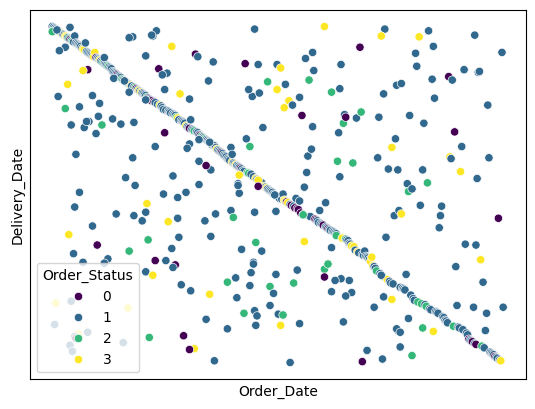

In [ ]:
sns.scatterplot(x='Order_Date', y='Delivery_Date', data=kpi, hue='Order_Status', palette='viridis')
plt.xticks([])
plt.yticks([])
plt.show()

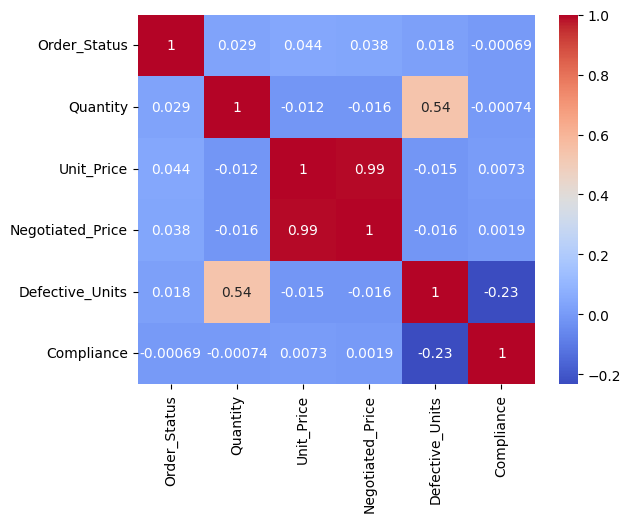

In [ ]:
corr_matrix = kpi_for_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
kpi_for_train.corr().style.background_gradient(cmap='Greens')

,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
Order_Status,1.000000,0.029041,0.044032,0.038356,0.017975,-0.000685
Quantity,0.029041,1.000000,-0.012347,-0.015731,0.542145,-0.000735
Unit_Price,0.044032,-0.012347,1.000000,0.994647,-0.015421,0.007282
Negotiated_Price,0.038356,-0.015731,0.994647,1.000000,-0.016187,0.001850
Defective_Units,0.017975,0.542145,-0.015421,-0.016187,1.000000,-0.233539
Compliance,-0.000685,-0.000735,0.007282,0.001850,-0.233539,1.000000


In [ ]:
# unit price prediction

X = kpi_for_train.drop('Unit_Price', axis=1)
y = kpi_for_train['Unit_Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 8.960941808450562
R-squared: 0.9897092656396702


<Axes: xlabel='Unit_Price'>

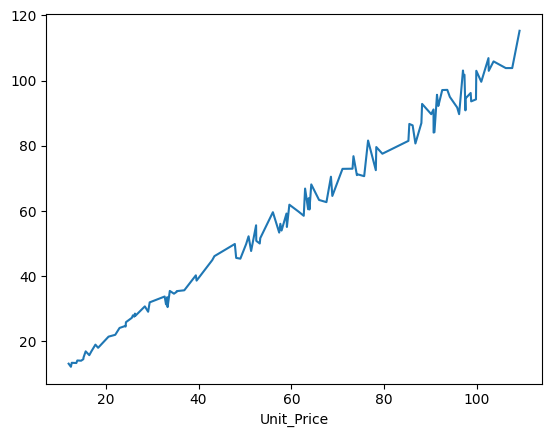

In [ ]:
sns.lineplot(x=y_test, y=y_pred)

In [ ]:
accuracy = lr.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9897092656396702


In [ ]:
num_for_pair = num.drop('Order_Status', axis=1)
num_for_pair.columns

Index(['Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units'], dtype='object')

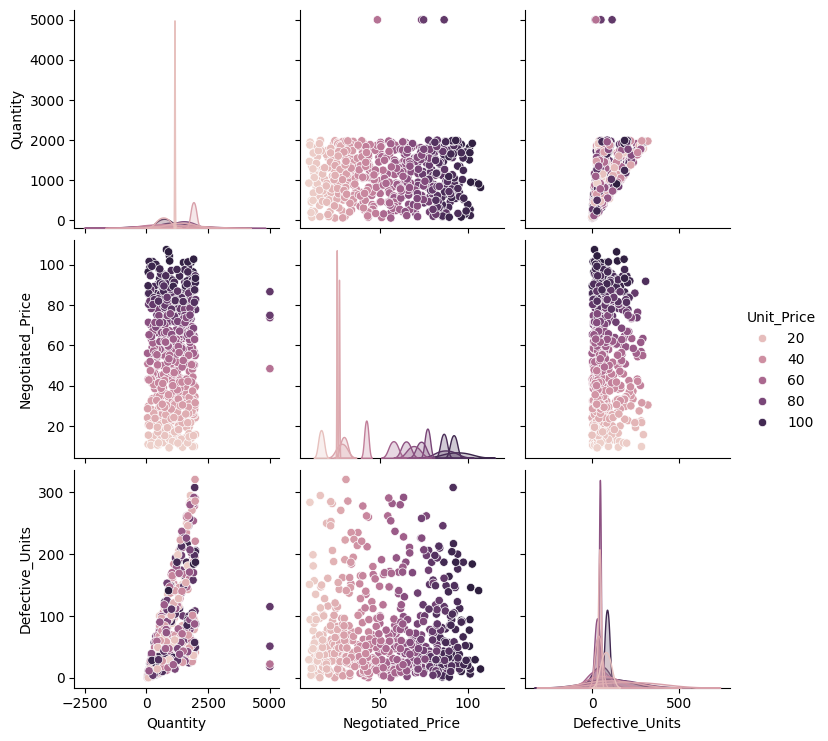

In [ ]:
sns.pairplot(num_for_pair,hue = 'Unit_Price')
plt.show()

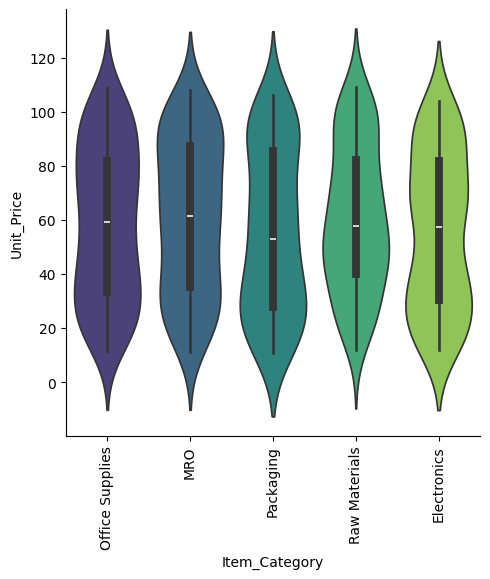

In [ ]:
sns.catplot(x='Item_Category', y='Unit_Price', data=kpi, kind='violin', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [ ]:
kpi.columns

Index(['Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')